In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [64]:
data=pd.read_excel("book1.xlsx")

In [65]:
data.head()

,no.of matches,avg,strike rate,runs,Unnamed: 4,base price
0,1.000000,1.000000,0.869333,1.000000,NaN,1.00
1,0.882353,0.834437,1.000000,0.930612,NaN,0.96
2,0.764706,0.821192,0.814667,0.896599,NaN,1.00
3,0.470588,0.818543,0.886667,0.819048,NaN,1.20
4,0.764706,0.781457,0.741333,0.755102,NaN,1.00


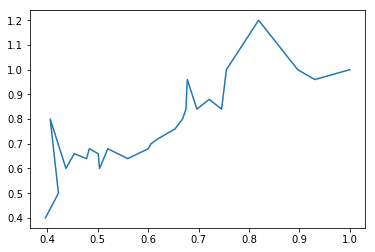

In [66]:
plt.plot(data['runs'],data['base price'])
plt.show()

In [50]:
for i in range(0,data['avg'].count()):
    data['base price'][i]=data['base price'][i]/100000
data.head()
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,no.of matches,avg,strike rate,runs,Unnamed: 4,base price
0,17,75.5,130.4,735,NaN,25
1,15,63.0,150.0,684,NaN,24
2,13,62.0,122.2,659,NaN,25
3,8,61.8,133.0,602,NaN,30
4,13,59.0,111.2,555,NaN,25
5,14,58.2,133.0,548,NaN,21
6,12,55.0,121.0,530,NaN,22
7,15,54.3,98.0,512,NaN,21
8,12,51.2,122.0,498,NaN,24
9,16,49.3,189.0,496,NaN,21


In [67]:
def partial_difference_o0(o0,o1,o2,o3,o4):
    a,b,c,d,e=0,0,0,0,0
    for i in range(0,data['avg'].count()):
        temp=o0+(o1*data['no.of matches'][i]+o2*data['avg'][i]+o3*data['strike rate'][i]+o4*data['runs'][i])-data['base price'][i]
        a=a+temp
        b=b+(round(temp*data['no.of matches'][i],2))
        c=c+(round(temp*data['avg'][i],2))
        d=d+(round(temp*data['strike rate'][i],2))
        e=e+(round(temp*data['runs'][i],2))
    return [int(a//data['avg'].count()),int(b//data['avg'].count()),int(c//data['avg'].count()),int(d//data['avg'].count()),int(e//data['avg'].count())]

In [9]:
def partial_difference_o1(o0,o1,o2,o3):
    a=0
    for i in range(0,data['State'].count()):
        a+=(o0+(o1*data['R&D Spend'][i]+o2*data['Administration'][i]+o3*data['Marketing Spend'][i])-data['Profit'][i])*data['R&D Spend'][i]
    return a/data['State'].count()

In [10]:
def partial_difference_o2(o0,o1,o2,o3):
    a=0
    for i in range(0,data['State'].count()):
        a+=(o0+(o1*data['R&D Spend'][i]+o2*data['Administration'][i]+o3*data['Marketing Spend'][i])-data['Profit'][i])*data['Administration'][i]
    return a/data['State'].count()

In [11]:
def partial_difference_o3(o0,o1,o2,o3):
    a=0
    for i in range(0,data['State'].count()):
        a+=(o0+(o1*data['R&D Spend'][i]+o2*data['Administration'][i]+o3*data['Marketing Spend'][i])-data['Profit'][i])*data['Marketing Spend'][i]
    return a/data['State'].count()

In [70]:
cur_o0=0
cur_o1=0
cur_o2=0
cur_o3=0
cur_o4=0
prev_o0=0
prev_o1=0
learning_rate=0.01
for i in range(0,100000):
    if(i!=0 and abs(cur_o0-prev_o0)<0.001):
        print('came1',i)
        break
    print('came')
    arr=partial_difference_o0(cur_o0,cur_o1,cur_o2,cur_o3,cur_o4)
    a,b,c,d,e=arr[0],arr[1],arr[2],arr[3],arr[4]
    #print(arr)
    #b=partial_difference_o1(cur_o0,cur_o1,cur_o2,cur_o3)
    #c=partial_difference_o2(cur_o0,cur_o1,cur_o2,cur_o3)
    #d=partial_difference_o3(cur_o0,cur_o1,cur_o2,cur_o3)
    prev_o0=cur_o0
    prev_o1=cur_o1
    cur_o0=round(cur_o0-(learning_rate*a),2)
    cur_o1=round(cur_o1-(learning_rate*b),2)
    cur_o2=round(cur_o2-(learning_rate*c),2)
    cur_o3=round(cur_o3-(learning_rate*d),2)
    cur_o4=round(cur_o4-(learning_rate*e),2)
    print(cur_o0,cur_o1,cur_o2,cur_o3)

came
0.01 0.01 0.01 0.01
came
0.02 0.02 0.02 0.02
came
0.03 0.03 0.03 0.03
came
0.04 0.04 0.04 0.04
came
0.05 0.05 0.05 0.05
came
0.06 0.06 0.06 0.06
came
0.07 0.07 0.07 0.07
came
0.08 0.08 0.08 0.08
came
0.09 0.09 0.09 0.09
came
0.1 0.1 0.1 0.1
came
0.11 0.11 0.11 0.11
came
0.12 0.12 0.12 0.12
came
0.13 0.13 0.13 0.13
came
0.14 0.14 0.14 0.14
came
0.15 0.15 0.15 0.15
came
0.16 0.16 0.16 0.16
came
0.17 0.17 0.17 0.17
came
0.18 0.18 0.18 0.18
came
0.19 0.19 0.19 0.19
came
0.2 0.2 0.2 0.2
came
0.21 0.2 0.21 0.21
came
0.21 0.2 0.21 0.21
came1 22


In [77]:
y=cur_o0+(cur_o1*0.8)+(cur_o2*0.8)+(cur_o3*1)+(cur_o4*0.9)
print(y*2500000)

2342500.0
